In [ ]:
#Name: S.Mohanraj
#REG NO:212221230065

In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image



In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape



(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

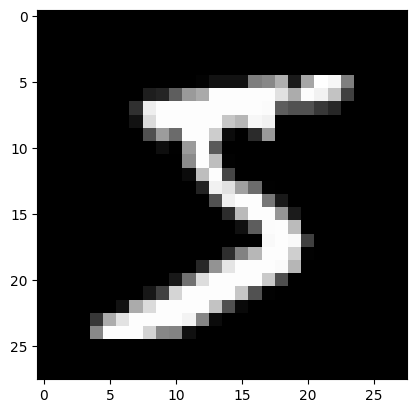

In [ ]:
single_image.shape

plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()



0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()


0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

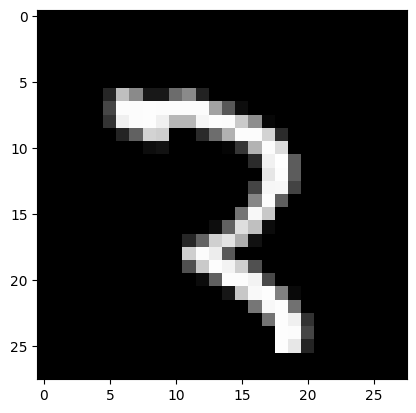

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/8
469/469 [==============================] - 23s 47ms/step - loss: 0.3321 - accuracy: 0.9026 - val_loss: 0.1215 - val_accuracy: 0.9631
Epoch 2/8
469/469 [==============================] - 22s 46ms/step - loss: 0.0994 - accuracy: 0.9703 - val_loss: 0.0741 - val_accuracy: 0.9766
Epoch 3/8
469/469 [==============================] - 22s 48ms/step - loss: 0.0664 - accuracy: 0.9803 - val_loss: 0.0564 - val_accuracy: 0.9825
Epoch 4/8
469/469 [==============================] - 19s 41ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0527 - val_accuracy: 0.9826
Epoch 5/8
469/469 [==============================] - 21s 46ms/step - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0453 - val_accuracy: 0.9857
Epoch 6/8
469/469 [==============================] - 20s 42ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 7/8
469/469 [==============================] - 20s 42ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0453 - val_accuracy: 0.9852

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.332084,0.902650,0.121481,0.9631
1,0.099447,0.970300,0.074129,0.9766
2,0.066422,0.980283,0.056364,0.9825
3,0.050745,0.984700,0.052738,0.9826
4,0.041655,0.987433,0.045263,0.9857


DHARSHAN V ,212222230031


<Axes: >

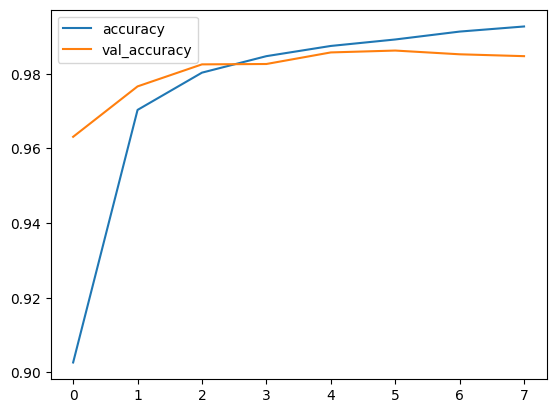

In [ ]:
print('DHARSHAN V ,212222230031')
metrics[['accuracy','val_accuracy']].plot()


DHARSHAN V ,212222230031


<Axes: >

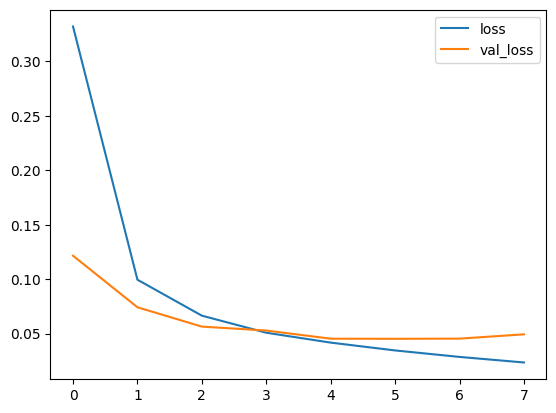

In [ ]:
print('DHARSHAN V ,212222230031')
metrics[['loss','val_loss']].plot()



In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 1s 4ms/step


In [ ]:
print('DHARSHAN V ,212222230031')
print(classification_report(y_test,x_test_predictions))


DHARSHAN V ,212222230031
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('3.jpeg')


In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('3.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 28ms/step


In [ ]:
print(x_single_prediction)


[3]


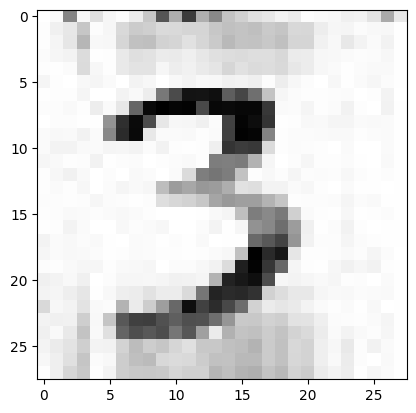

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 24ms/step


In [ ]:
print(x_single_prediction)


[3]
